Dataset shape: (178, 13)
Number of true classes: 3


C:\Users\ma007\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ma007\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(



--- Clustering Evaluation ---
KMeans ARI: 0.8974949815093207
KMeans NMI: 0.8758935341223069
DBSCAN ARI: 0.0
DBSCAN NMI: 0.0


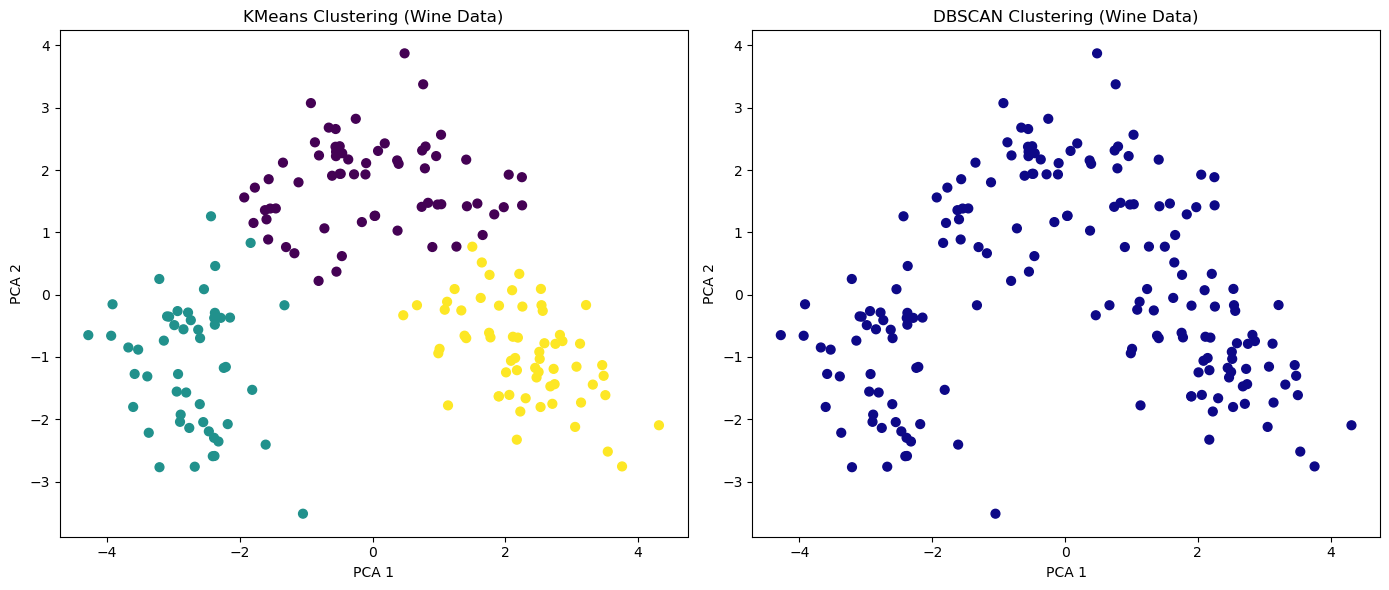


--- Insights ---
1) K-Means generally matches the true wine classes better (higher ARI/NMI).
2) DBSCAN performance depends heavily on eps & min_samples; many points may be marked as noise (-1).
3) K-Means assumes spherical clusters, which works decently for this dataset.
4) DBSCAN is better suited for irregular/non-globular clusters but struggles with high-dimensional continuous data like Wine.


In [4]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# -------------------------------
# Step 1: Loading dataset
# -------------------------------
wine = load_wine()
X = wine.data
y_true = wine.target

print("Dataset shape:", X.shape)
print("Number of true classes:", len(np.unique(y_true)))

# -------------------------------
# Step 2: Preprocessing (Standardize features)
# -------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -------------------------------
# Step 3: Applying K-Means Clustering
# -------------------------------
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# -------------------------------
# Step 4: Applying DBSCAN Clustering
# -------------------------------
dbscan = DBSCAN(eps=1.5, min_samples=5)  # parameters can be tuned
dbscan_labels = dbscan.fit_predict(X_scaled)

# -------------------------------
# Step 5: Evaluating Clustering vs True Labels
# -------------------------------
print("\n--- Clustering Evaluation ---")
print("KMeans ARI:", adjusted_rand_score(y_true, kmeans_labels))
print("KMeans NMI:", normalized_mutual_info_score(y_true, kmeans_labels))

print("DBSCAN ARI:", adjusted_rand_score(y_true, dbscan_labels))
print("DBSCAN NMI:", normalized_mutual_info_score(y_true, dbscan_labels))

# -------------------------------
# Step 6: Visualizing Results
# -------------------------------
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(14,6))

# KMeans plot
plt.subplot(1,2,1)
plt.scatter(X_pca[:,0], X_pca[:,1], c=kmeans_labels, cmap="viridis", s=40)
plt.title("KMeans Clustering (Wine Data)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")

# DBSCAN plot
plt.subplot(1,2,2)
plt.scatter(X_pca[:,0], X_pca[:,1], c=dbscan_labels, cmap="plasma", s=40)
plt.title("DBSCAN Clustering (Wine Data)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")

plt.tight_layout()
plt.show()

# -------------------------------
# Step 7: Insights
# -------------------------------
print("\n--- Insights ---")
print("1) K-Means generally matches the true wine classes better (higher ARI/NMI).")
print("2) DBSCAN performance depends heavily on eps & min_samples; many points may be marked as noise (-1).")
print("3) K-Means assumes spherical clusters, which works decently for this dataset.")
print("4) DBSCAN is better suited for irregular/non-globular clusters but struggles with high-dimensional continuous data like Wine.")
